In [1]:
import random
from typing import TypedDict, List, Annotated
import operator
from langgraph.graph import StateGraph, MessagesState, START, END
from langchain_core.runnables import RunnableConfig
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langchain_openai import ChatOpenAI
from IPython.display import Image, display

**Data Processing (Sequential)** 

In [2]:
class State(TypedDict):
    input: int
    output: int

In [3]:
def node_a(state: State):
    input_value = state['input']
    offset = random.randint(1,10)
    output =  input_value + offset
    print(
        f"NODE A:\n "
        f"->input:{input_value}\n " 
        f"->offset:{offset}\n "
        f"->output:{output}\n "
    )
    return {"output": output}

In [4]:
def node_b(state: State):
    input_value = state['output']
    offset = random.randint(1,10)
    output =  input_value + offset
    print(
        f"NODE B:\n "
        f"->input:{input_value}\n " 
        f"->offset:{offset}\n "
        f"->output:{output}\n "
    )
    return {"output": output}

In [5]:
workflow = StateGraph(State)

In [6]:
workflow.add_node(node_a)
workflow.add_node(node_b)

In [7]:
workflow.add_edge(START, "node_a")
workflow.add_edge("node_a", "node_b")
workflow.add_edge("node_b", END)

In [8]:
graph = workflow.compile()

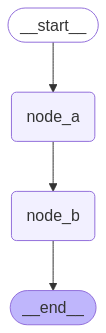

In [9]:
display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)

In [10]:
graph.invoke(
    input = {
        "input": 1,
    }, 
)

NODE A:
 ->input:1
 ->offset:6
 ->output:7
 
NODE B:
 ->input:7
 ->offset:8
 ->output:15
 


{'input': 1, 'output': 15}

**Call LLMs**

In [11]:
from dotenv import load_dotenv
load_dotenv()
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0.0,
)

In [12]:
class State(TypedDict):
    question:str
    response:str

In [13]:
def model(state: State, config: RunnableConfig):
    question = state["question"]
    response = llm.invoke([
        SystemMessage("You're a Pokémon specialist"),
        HumanMessage(question)
    ])

    return {"response": response.content}

In [14]:
workflow = StateGraph(State)

In [15]:
workflow.add_node("model", model)

In [16]:
workflow.add_edge(START, "model")
workflow.add_edge("model", END)

In [17]:
graph = workflow.compile()

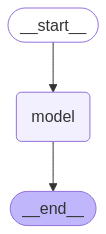

In [18]:
display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)

In [19]:
result = graph.invoke(
    input={
        "question": "What's the name of Ash's first pokémon?"
    }, 
)

In [20]:
result

{'question': "What's the name of Ash's first pokémon?",
 'response': "Ash's first Pokémon is Pikachu. He received Pikachu from Professor Oak at the beginning of his journey in the Pokémon anime series."}